# PCA grapher

This notebook will be used for creating the PCA graph

## ERBB2, MAPK9, AKT2 & SRC

I'm mostly just testing at this point

In [1]:
require(ggplot2)
require(readr)

Loading required package: ggplot2
Loading required package: readr


In [2]:
all.genes <- as.data.frame(read_tsv("../data/GSM1536837_06_01_15_TCGA_24.tumor_Rsubread_TPM.txt.gz"))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)
See spec(...) for full column specifications.


In [3]:
row.names(all.genes) <- all.genes$X1
all.genes$X1 <- NULL

In [4]:
all.genes <- as.data.frame(t(all.genes))

In [5]:
her2.data <- as.data.frame(read_tsv("../data/GSE62944_06_01_15_TCGA_24_548_Clinical_Variables_9264_Samples.txt"))

Warning message:
“Missing column names filled in: 'X1' [1], 'X2' [2], 'X3' [3]”Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


In [6]:
row.names(her2.data) <- her2.data$X1
her2.data$X1 <- NULL
her2.data$X2 <- NULL
her2.data$X3 <- NULL

her2.data <- as.data.frame(t(her2.data))
her2.data <- subset(her2.data, her2_status_by_ihc != "[Not Available]" & her2_status_by_ihc != "[Not Evaluated]" & !is.na(her2_status_by_ihc))

In [7]:
all.genes <- all.genes[row.names(her2.data),]
all.genes <- cbind(all.genes, her2.data)

In [8]:
temp.genes <- all.genes[, c("ERBB2", "MAPK9", "AKT2", "SRC")]

In [9]:
head(temp.genes)

,ERBB2,MAPK9,AKT2,SRC
TCGA-A2-A0T1-01A-21R-A084-07,3363.48753,20.06973,62.11473,42.63683
TCGA-A7-A3J0-01A-11R-A213-07,63.89551,34.86201,69.93420,24.92678
TCGA-AO-A126-01A-11R-A10J-07,139.35904,22.95479,75.10548,37.58519
TCGA-E2-A14X-01A-11R-A115-07,110.16117,25.37706,69.52245,25.84458
TCGA-AR-A0TP-01A-11R-A084-07,79.62151,23.32826,60.66447,79.25964
TCGA-E2-A15S-01A-11R-A115-07,240.03714,74.05186,123.13259,38.56878


In [10]:
temp.pc <- prcomp(temp.genes, scale = T)

In [11]:
temp.pc

Standard deviations (1, .., p=4):
[1] 1.1173220 1.0371366 0.9531528 0.8760359

Rotation (n x k) = (4 x 4):
             PC1       PC2        PC3        PC4
ERBB2 -0.4784157 0.4366216 -0.6720929  0.3588469
MAPK9 -0.1608284 0.7972565  0.4143176 -0.4084816
AKT2   0.6183895 0.3814529  0.1638849  0.6672555
SRC    0.6023679 0.1680397 -0.5914168 -0.5090597

In [12]:
percentVE <- 100 * temp.pc$sdev^2 / sum(temp.pc$sdev^2)

In [13]:
percentVE.df <- data.frame(PC = 1:4, PercentExplained = percentVE)

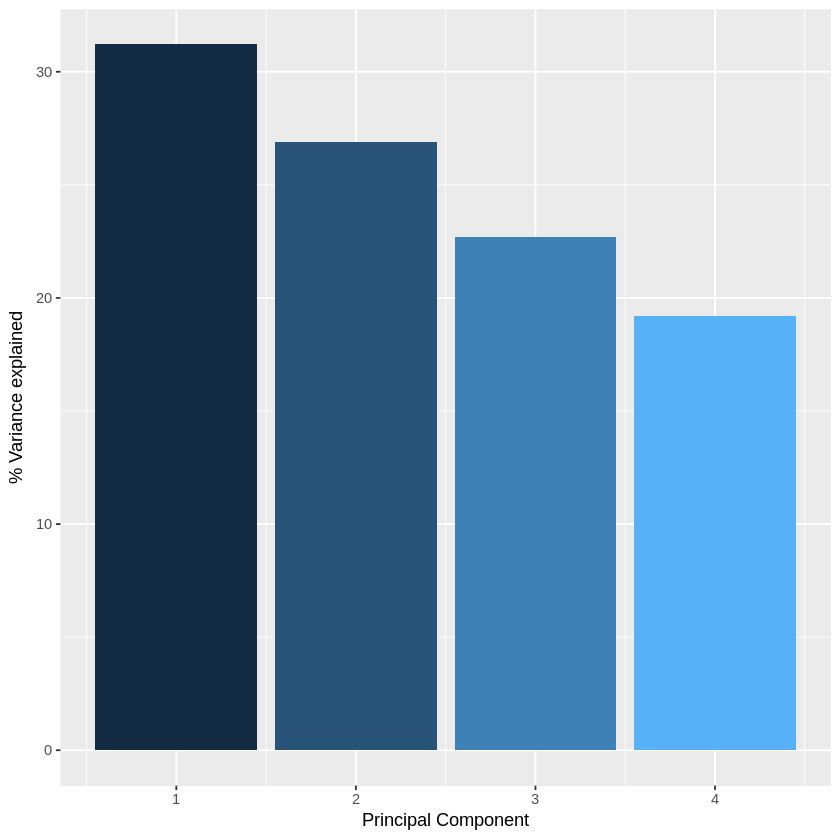

In [14]:
ggplot(percentVE.df, aes(PC, PercentExplained, fill=PC)) + 
  geom_bar(stat="identity") +
  xlab("Principal Component") +
  ylab("% Variance explained") +
  theme(legend.position="none") # Remove the legend

In [15]:
temp.pc.df <- as.data.frame(temp.pc$x)

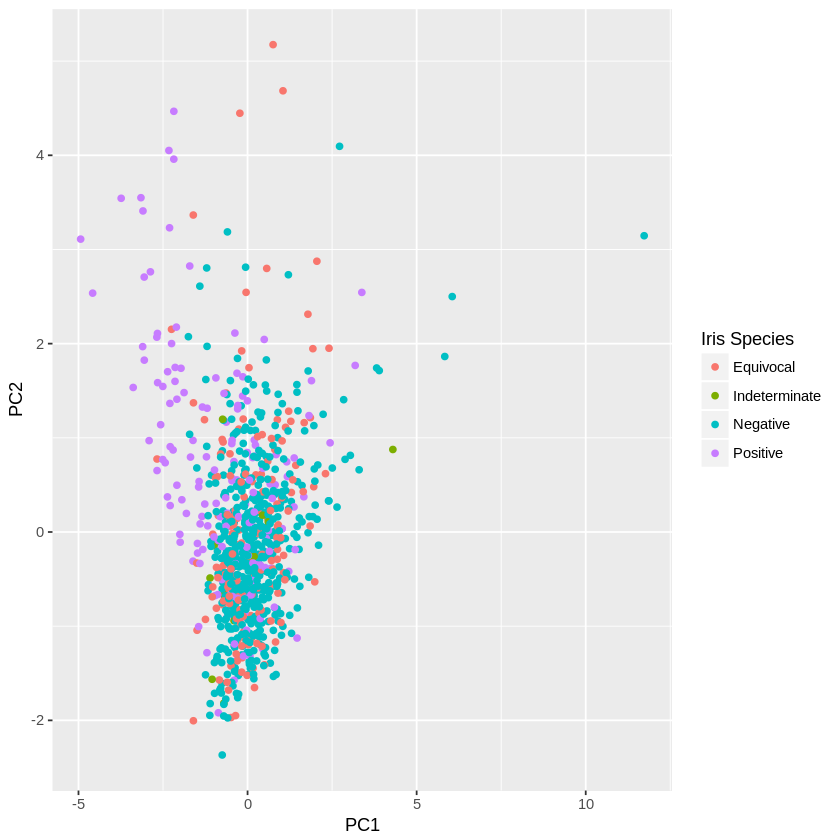

In [16]:
ggplot(temp.pc.df, aes(x=PC1, y=PC2)) + 
  geom_point(aes(col=all.genes$her2_status_by_ihc)) +
  labs(col = "Iris Species")  # This changes the legend title

## ERBB2 , AKT2 , BRAF , SHC3 , NCK2 , CAMK2B, ABL1 , PLCG2 , MAP2K7, GRB2

In [20]:
temp.genes <- all.genes[, c('ERBB2', 'AKT2', 'BRAF', 'SHC3', 'NCK2', 'CAMK2B', 'ABL1', 'PLCG2', 'MAP2K7', 'GRB2')]

In [21]:
head(temp.genes)

,ERBB2,AKT2,BRAF,SHC3,NCK2,CAMK2B,ABL1,PLCG2,MAP2K7,GRB2
TCGA-A2-A0T1-01A-21R-A084-07,3363.48753,62.11473,1.737148,2.967508,58.72055,0.5401734,69.82523,14.899490,19.36236,147.2807
TCGA-A7-A3J0-01A-11R-A213-07,63.89551,69.93420,4.713472,1.542207,43.82583,4.4763991,50.49913,4.950214,51.61664,185.6729
TCGA-AO-A126-01A-11R-A10J-07,139.35904,75.10548,3.743424,12.971203,35.99288,13.5068426,40.15414,7.461826,29.37482,259.5940
TCGA-E2-A14X-01A-11R-A115-07,110.16117,69.52245,4.047170,13.132674,54.87429,0.3903973,25.30443,46.014617,34.63506,114.3735
TCGA-AR-A0TP-01A-11R-A084-07,79.62151,60.66447,11.736840,3.701779,253.34294,0.8112730,28.02501,48.846053,43.61086,102.7919
TCGA-E2-A15S-01A-11R-A115-07,240.03714,123.13259,16.680845,2.616065,39.64944,8.7854238,73.61166,5.268007,30.51508,3544.1593


In [22]:
temp.pc <- prcomp(temp.genes, scale = T)

In [23]:
temp.pc

Standard deviations (1, .., p=10):
 [1] 1.2970948 1.2434172 1.0713319 1.0186074 0.9838310 0.9653042 0.9159220
 [8] 0.8296981 0.7737156 0.7486403

Rotation (n x k) = (10 x 10):
               PC1         PC2         PC3        PC4         PC5         PC6
ERBB2  -0.18107559  0.27500925 -0.51224789  0.5219370 -0.14470157  0.03367023
AKT2    0.50521190  0.02900682  0.25959720  0.1304239  0.08123649 -0.14027117
BRAF    0.42333048  0.23496462 -0.11813003 -0.3467711 -0.09912435  0.43327874
SHC3   -0.02020723 -0.16084986  0.31675307  0.2781001 -0.85947616  0.17144993
NCK2    0.23112736 -0.50304186 -0.38908329  0.1790271  0.01776415  0.16070715
CAMK2B  0.08103689  0.17340287  0.34104562  0.5368626  0.39520159  0.58574453
ABL1    0.39239838  0.25122495 -0.43646105  0.2182458 -0.07278438 -0.21273935
PLCG2   0.13675409 -0.53745549 -0.22503219 -0.1455292  0.02500371  0.37692437
MAP2K7  0.43507962 -0.26229477  0.21687086  0.2551144  0.06041585 -0.44053692
GRB2    0.33225932  0.37223228  0.00745401 -

In [24]:
percentVE <- 100 * temp.pc$sdev^2 / sum(temp.pc$sdev^2)

In [27]:
percentVE.df <- data.frame(PC = 1:10, PercentExplained = percentVE)

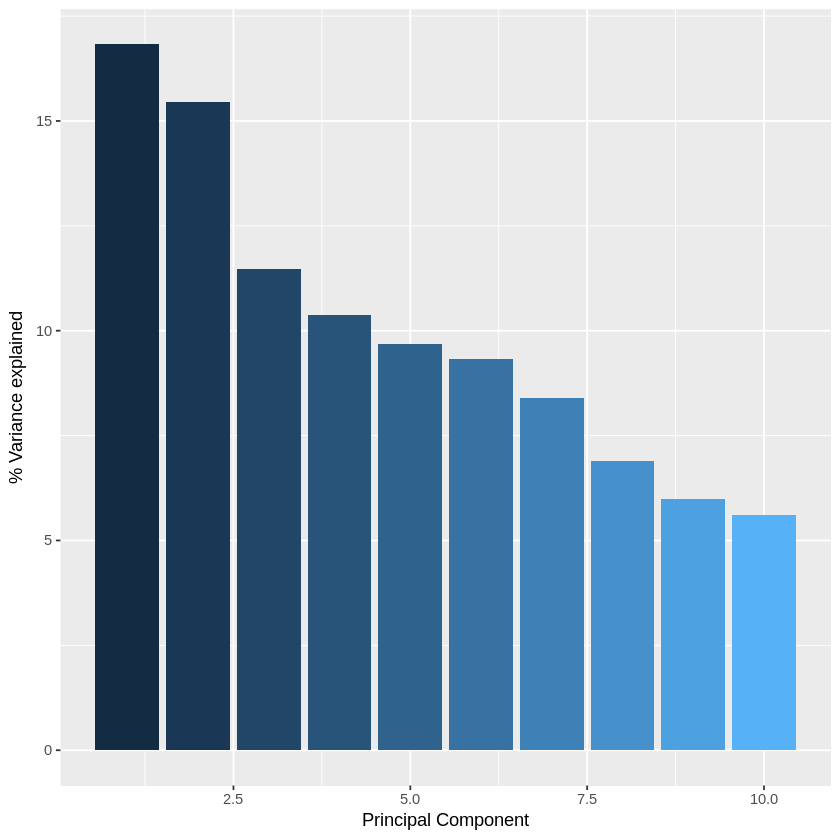

In [28]:
ggplot(percentVE.df, aes(PC, PercentExplained, fill=PC)) + 
  geom_bar(stat="identity") +
  xlab("Principal Component") +
  ylab("% Variance explained") +
  theme(legend.position="none") # Remove the legend

In [29]:
temp.pc.df <- as.data.frame(temp.pc$x)

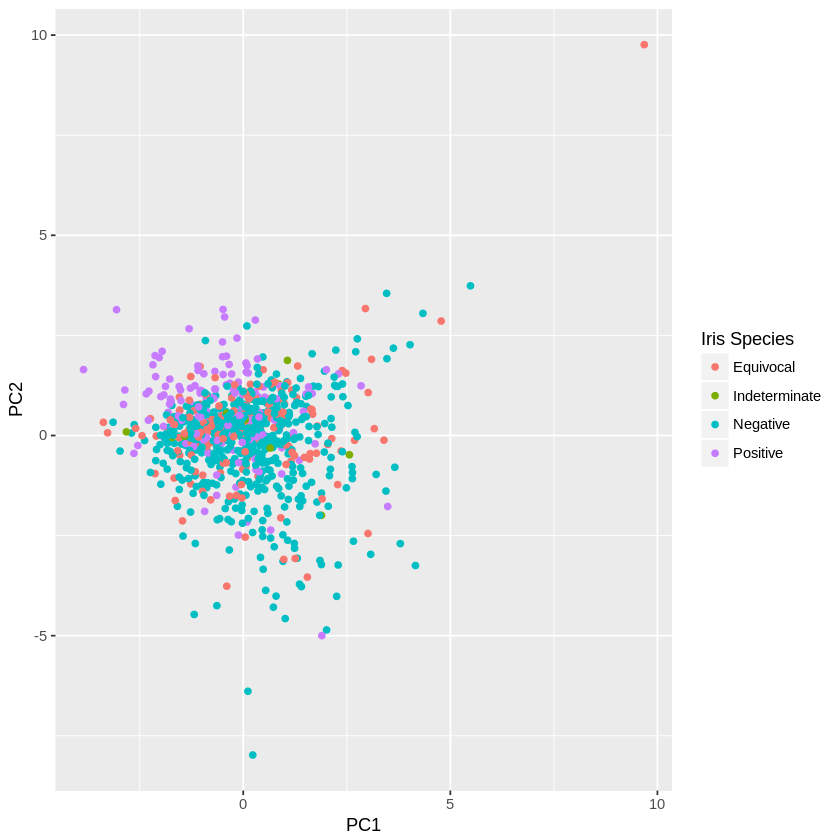

In [30]:
ggplot(temp.pc.df, aes(x=PC1, y=PC2)) + 
  geom_point(aes(col=all.genes$her2_status_by_ihc)) +
  labs(col = "Iris Species")  # This changes the legend title

In [34]:
seqd.genes <- scan("../data/genes.txt", what = "")

In [36]:
temp.genes <- all.genes[, seqd.genes]

In [37]:
temp.pc <- prcomp(temp.genes, scale = T)

In [38]:
temp.pc

Standard deviations (1, .., p=87):
 [1] 3.5742750 2.4429579 1.9422606 1.9186156 1.6926977 1.5849573 1.3363656
 [8] 1.3175282 1.3080086 1.2494976 1.2317736 1.1893680 1.1798452 1.1682714
[15] 1.1550129 1.1101817 1.0985151 1.0922478 1.0798387 1.0660997 1.0592679
[22] 1.0286963 1.0206564 1.0039480 0.9889560 0.9805785 0.9677046 0.9535220
[29] 0.9426295 0.9323548 0.9241184 0.9142406 0.9051843 0.8949004 0.8890088
[36] 0.8784604 0.8700878 0.8505174 0.8447178 0.8327212 0.8286819 0.8059942
[43] 0.8000944 0.7965746 0.7876421 0.7699791 0.7594362 0.7507977 0.7456683
[50] 0.7380902 0.7296889 0.7226305 0.7192199 0.7060086 0.6994315 0.6834766
[57] 0.6774751 0.6642118 0.6572077 0.6545553 0.6449596 0.6365136 0.6250909
[64] 0.6148446 0.6026239 0.6000431 0.5913659 0.5802975 0.5642395 0.5565591
[71] 0.5541465 0.5454843 0.5290110 0.5233234 0.5133500 0.5040623 0.4920946
[78] 0.4788172 0.4712135 0.4580556 0.4504720 0.4363347 0.4127926 0.3962755
[85] 0.3839042 0.3715440 0.2755038

Rotation (n x k) = (87 x 87):

In [39]:
percentVE <- 100 * temp.pc$sdev^2 / sum(temp.pc$sdev^2)

In [41]:
percentVE.df <- data.frame(PC = 1:87, PercentExplained = percentVE)

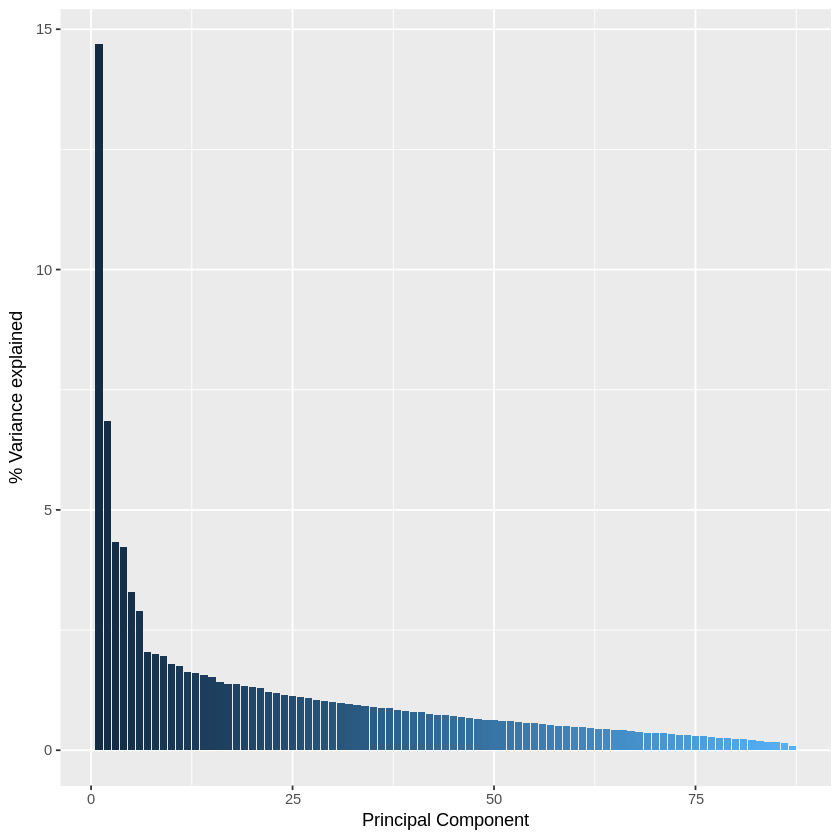

In [42]:
ggplot(percentVE.df, aes(PC, PercentExplained, fill=PC)) + 
  geom_bar(stat="identity") +
  xlab("Principal Component") +
  ylab("% Variance explained") +
  theme(legend.position="none") # Remove the legend

In [43]:
temp.pc.df <- as.data.frame(temp.pc$x)

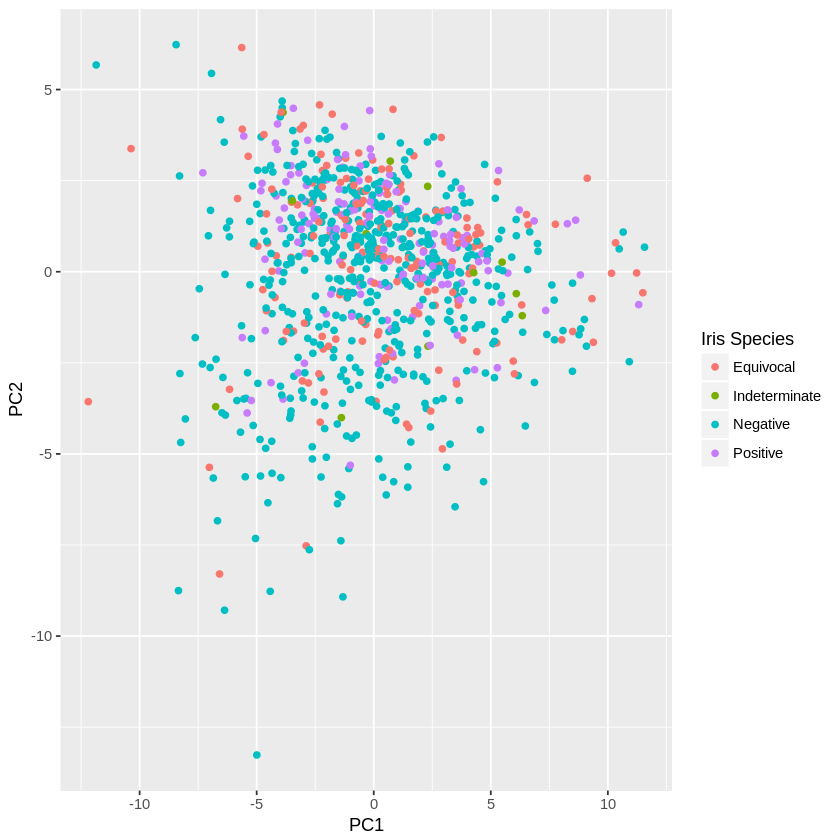

In [44]:
ggplot(temp.pc.df, aes(x=PC1, y=PC2)) + 
  geom_point(aes(col=all.genes$her2_status_by_ihc)) +
  labs(col = "Iris Species")  # This changes the legend title

In [55]:
all.pc <- prcomp(subset(all.genes, select = (names(all.genes) %ni% colnames(her2.data)) & 
                        apply(all.genes, 2, function(x){!all(x == 0)})), scale = T)

In [56]:
all.pc

Standard deviations (1, .., p=893):
  [1] 4.251374e+01 3.396574e+01 2.944689e+01 2.774883e+01 2.040315e+01
  [6] 1.900601e+01 1.658263e+01 1.615891e+01 1.486013e+01 1.425434e+01
 [11] 1.388006e+01 1.279888e+01 1.271691e+01 1.242007e+01 1.203615e+01
 [16] 1.171352e+01 1.132707e+01 1.117138e+01 1.097878e+01 1.083608e+01
 [21] 1.043924e+01 1.028904e+01 1.019948e+01 1.010540e+01 9.998784e+00
 [26] 9.844902e+00 9.732115e+00 9.720400e+00 9.618008e+00 9.581382e+00
 [31] 9.448805e+00 9.278776e+00 9.254442e+00 9.144374e+00 9.056644e+00
 [36] 8.928416e+00 8.832877e+00 8.765817e+00 8.687399e+00 8.650014e+00
 [41] 8.587544e+00 8.497770e+00 8.381532e+00 8.352531e+00 8.252024e+00
 [46] 8.212601e+00 8.166378e+00 8.096157e+00 8.062507e+00 7.952229e+00
 [51] 7.921026e+00 7.910788e+00 7.819163e+00 7.722293e+00 7.706044e+00
 [56] 7.660112e+00 7.601582e+00 7.574112e+00 7.542762e+00 7.504292e+00
 [61] 7.494677e+00 7.411730e+00 7.395036e+00 7.350024e+00 7.329232e+00
 [66] 7.265365e+00 7.234353e+00 7.175011e

In [57]:
percentVE <- 100 * all.pc$sdev^2 / sum(all.pc$sdev^2)

In [58]:
percentVE.df <- data.frame(PC = 1:893, PercentExplained = percentVE)

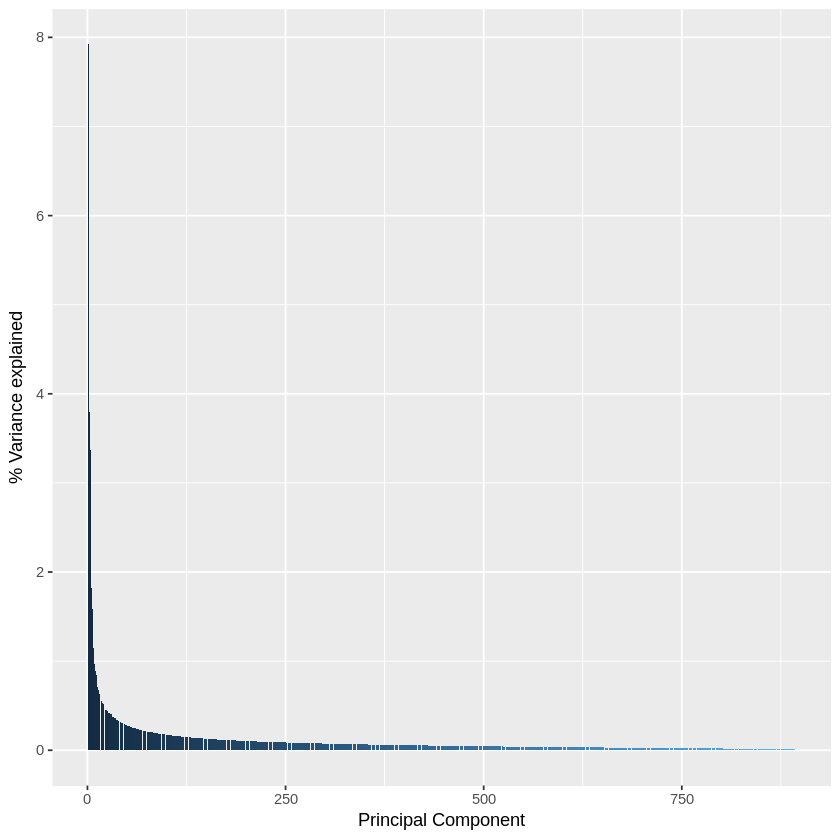

In [59]:
ggplot(percentVE.df, aes(PC, PercentExplained, fill=PC)) + 
  geom_bar(stat="identity") +
  xlab("Principal Component") +
  ylab("% Variance explained") +
  theme(legend.position="none") # Remove the legend

In [60]:
all.pc.df <- as.data.frame(temp.pc$x)

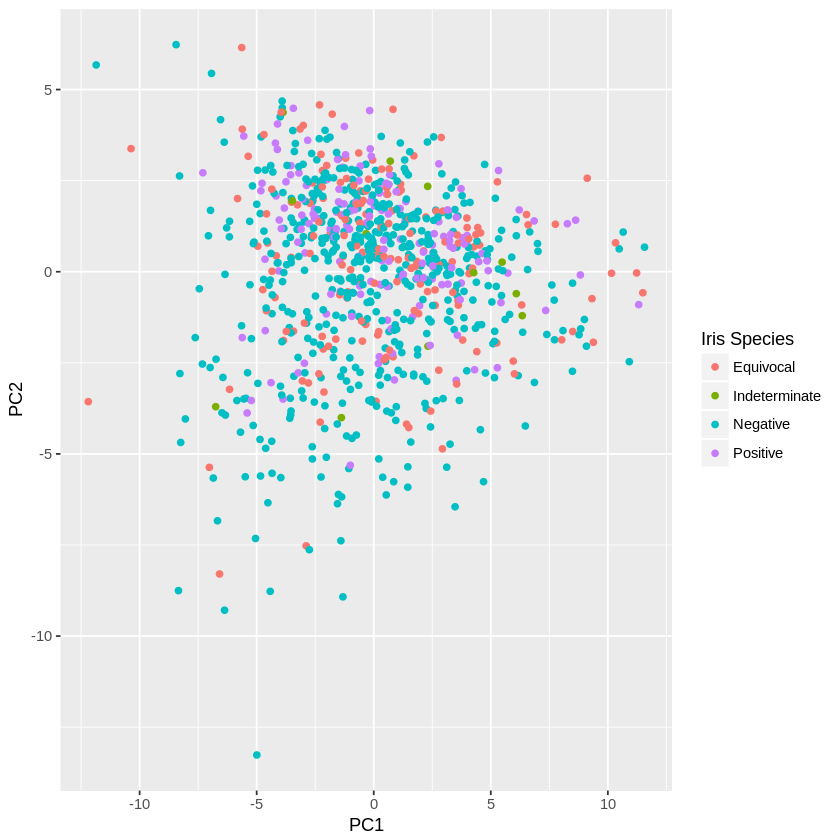

In [61]:
ggplot(all.pc.df, aes(x=PC1, y=PC2)) + 
  geom_point(aes(col=all.genes$her2_status_by_ihc)) +
  labs(col = "Iris Species")  # This changes the legend title